In [25]:
import numpy as np
from IPython.display import Image, display


### Questão 01
1. d

In [26]:
r = np.log(0.05) - np.log(np.exp2(12))

In [27]:
a = np.log(400000)*10 +np.square(0.05)*400000*(-1/8)
b = np.log(420000)*10 +np.square(0.05)*420000*(-1/8)
c = np.log(440000)*10 +np.square(0.05)*440000*(-1/8)
d = np.log(460000)*10 +np.square(0.05)*460000*(-1/8)
e = np.log(480000)*10 +np.square(0.05)*480000*(-1/8)

In [28]:
print('difereças entre:')
print('item a', r-a)
print('item b', r-b)
print('item c', r-c)
print('item d', r-d) # menor diferença
print('item e', r-e)

difereças entre:
item a -15.30569670117451
item b -9.543598342868831
item c -3.758798499217745
item d 2.046683875073926
item e 7.871087730885948


In [29]:
dvc = 10
N = 1000
epsilon = 0.05
delta = 0.05
for i in range(10):
    N = (8/np.square(epsilon)) * np.log((4*(2*N)**dvc)/delta)

N

452956.8647116172

### Questão 02 e 03

2. d
3. c


In [30]:
def vc_bound(N, dvc, delta):
    return np.sqrt((8/N)*np.log((4*((2*N)**dvc))/delta))

def rademacher_bound(N, dvc, delta):
    return np.sqrt((2*np.log(2*float(N)*float(N)**dvc))/N) + np.sqrt((2/N)*np.log(1/delta)) + 1/N

def parrondo_bound(N, dvc, delta, epsilon):
    epsilon = 0
    for _ in range(10):
        epsilon = np.sqrt((1/N) * (2*epsilon + np.log(6*(2*N)**dvc/delta)))
    return epsilon

def devroye_bound(N, dvc, delta, epsilon):
    epsilon = 0
    for _ in range(10):
        epsilon = np.sqrt((1/(2*N)) * (4*epsilon*(1+epsilon) + np.log(4) + 2*dvc*np.log(N) - np.log(delta)))
    return epsilon

In [31]:
N = 10000
dvc = 50
delta = 0.05
epsilon = 0.05

vc = vc_bound(N, dvc, delta)
rademacher = rademacher_bound(N, dvc, delta)
parrondo = parrondo_bound(N, dvc, delta, epsilon)
devroye = devroye_bound(N, dvc, delta, epsilon)

In [32]:
print('vc', vc)
print('rademacher', rademacher)
print('parrondo', parrondo)
print('devroye', devroye)

vc 0.632174915200836
rademacher 0.3313087859616395
parrondo 0.22369829368078561
devroye 0.21522804980824667


In [33]:
N = 5
dvc = 50
delta = 0.05
epsilon = 1

vc = vc_bound(N, dvc, delta)
rademacher = rademacher_bound(N, dvc, delta)
parrondo = parrondo_bound(N, dvc, delta, epsilon)
devroye = devroye_bound(N, dvc, delta, epsilon)


In [34]:
print('vc', vc)
print('rademacher', rademacher)
print('parrondo', parrondo)
print('devroye', devroye)

vc 13.828161484991483
rademacher 7.048776564183685
parrondo 5.101361981989948
devroye 5.5923625614728


### Questões 04 a 06
04. d
05. b
06. a

In [35]:
def create_point():
    x = np.random.uniform(-1, 1)
    y = np.sin(x * np.pi)
    return [x, y]



In [36]:
def calculate_g_bar_coefficient():
    total_a = []
    for _ in range (1000):
        x1 = create_point()
        x2 = create_point()
        a = abs(x1[1] - x2[1])/abs(x1[0] - x2[0])
        total_a.append(a)

    avg_a = np.mean(total_a)
    return np.round(avg_a, 2), total_a

In [37]:
a, total_a = calculate_g_bar_coefficient()
a
# item d

1.47

In [38]:
def calculate_bias(a):
    total_bias = []
    for _ in range(1000):
        x_bias = create_point()
        g_bar_bias = a * x_bias[0]
        total_bias.append((x_bias[1]-g_bar_bias)**2)
    return np.mean(total_bias)

In [39]:
bias = calculate_bias(a)
bias
# item b

0.3011796767340694

In [40]:
def calculate_var(a, total_a):
    total_var = []

    for _ in range(1000):
        x_var = create_point()
        g_bar_var = a * x_var[0]

        for ax in total_a:
            gx_var = ax * x_var[0]
            total_var.append((g_bar_var - gx_var)**2)
    return np.mean(total_var)

In [41]:
var = calculate_var(a, total_a)
# item a

### Questão 07
a) $h(x) = b$ \\
b) $h(x) = ax$ \\
c) $h(x) = ax + b$ \\
d) $h(x) = ax^2$ \\
e) $h(x) = ax^2 + b$

7. b

In [42]:
def calculate_error_b():
    total_b = []
    for _ in range (1000):
        x1 = create_point()
        x2 = create_point()
        b = abs(x1[0] - x2[0])/2
        total_b.append(b)

    avg_b = np.mean(total_b)
    np.round(avg_b, 4)

    total_bias = []
    for _ in range(1000):
        x_bias = create_point()
        g_bar_bias = b
        total_bias.append((x_bias[1]-g_bar_bias)**2)

    total_var = []

    for _ in range(1000):
        x_var = create_point()
        g_bar_var = b
        for bx in total_b:
            gx_var = bx
            total_var.append((g_bar_var - gx_var)**2)

    return np.mean(total_var) + np.mean(total_bias)


In [43]:
def calculate_error_ab():
    total_a = []
    total_b = []
    for _ in range (1000):
        x1 = create_point()
        x2 = create_point()
        a = abs(x1[1] - x2[1]) / abs(x1[0] - x2[0])
        b = x1[1] - a * x1[0]
        total_a.append(a)
        total_b.append(b)

    avg_a = np.mean(total_a)
    avg_b = np.mean(total_b)

    total_bias = []
    for _ in range(1000):
        x_bias = create_point()
        g_bar_bias = avg_a*x_bias[0] + avg_b
        total_bias.append((x_bias[1]-g_bar_bias)**2)

    total_var = []
    for _ in range(1000):
        x_var = create_point()
        g_bar_var = avg_a*x_var[0] + avg_b
        for ax, bx in zip(total_a, total_b):
            gx_var = ax * x_var[0] + bx
            total_var.append((g_bar_var - gx_var)**2)

    return np.mean(total_var) + np.mean(total_bias)


In [44]:
def calculate_error_asquared():
    total_a = []
    total_b = []
    for _ in range (1000):
        x1 = create_point()
        x2 = create_point()
        a = abs(x1[1] - x2[1]) / abs(x1[0] - x2[0])

        total_a.append(a)

    avg_a = np.mean(total_a)

    total_bias = []
    for _ in range(1000):
        x_bias = create_point()
        g_bar_bias = avg_a* np.square(x_bias[0])
        total_bias.append((x_bias[1]-g_bar_bias)**2)

    total_var = []
    for _ in range(1000):
        x_var = create_point()
        g_bar_var = avg_a*np.square(x_var[0])

        for ax in total_a:
            gx_var = ax * np.square(x_var[0])
            total_var.append((g_bar_var - gx_var)**2)

    return np.mean(total_var) + np.mean(total_bias)


In [45]:
def calculate_error_ab():
    total_a = []
    total_b = []
    for _ in range (1000):
        x1 = create_point()
        x2 = create_point()
        a = abs(x1[1] - x2[1]) / abs(x1[0] - x2[0])
        b = x1[1] - a * np.square(x1[0])
        total_a.append(a)
        total_b.append(b)

    avg_a = np.mean(total_a)
    avg_b = np.mean(total_b)

    total_bias = []
    for _ in range(1000):
        x_bias = create_point()
        g_bar_bias = avg_a*np.square(x_bias[0]) + avg_b
        total_bias.append((x_bias[1]-g_bar_bias)**2)

    total_var = []
    for _ in range(1000):
        x_var = create_point()
        g_bar_var = avg_a*np.square(x_var[0]) + avg_b

        for ax, bx in zip(total_a, total_b):
            gx_var = ax * np.square(x_var[0]) + bx
            total_var.append((g_bar_var - gx_var)**2)

    return np.mean(total_var) + np.mean(total_bias)


In [46]:
print(calculate_error_b())
print(var+bias)
print(calculate_error_ab())
print(calculate_error_asquared())
print(calculate_error_ab())

0.60916812210196
0.5378415157223415
1.5394319301258645
1.1095694528243731
1.5469055970113652


### Questão 08

8. c

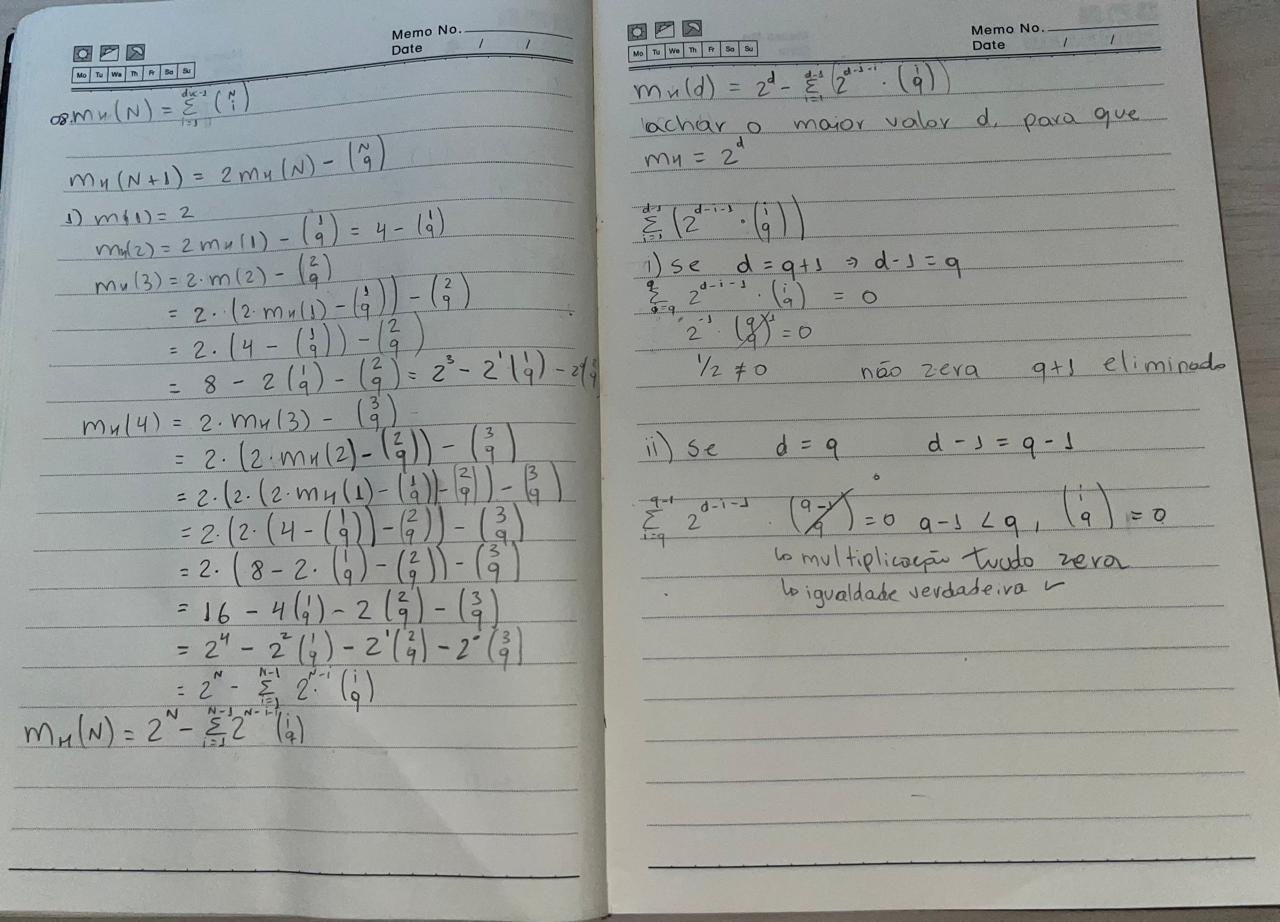

In [47]:
display(Image(filename='hw4_pics/q8.jpeg'))


### Questão 09
Menor valor -> se não houver interseção, não tem hypotesis set, então o vc dimension seria 0

A interseção de hypotesis sets deve ser menor que os sets no hypotesis set no geral, incluindo o mínimo. Como pede o tightest bound:
9. b

### Questão 10

O mínimo é o valor máximo do hypotesis set. O segundo a união entre eles, o terceiro ???
